# Comparison: SPECT
https://archive.ics.uci.edu/ml/datasets/spect+heart

In [ ]:
from google.colab import drive
import sys
import os

drive.mount('/content/drive/')
sys.path.append('/content/drive/MyDrive/Project/EDQC/dqc')

Mounted at /content/drive/


## Initialization

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from utils.visualization import animator


## Reading Data

In [ ]:
df1 = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/spect/SPECT.train', header=None)
df2 = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/spect/SPECT.test', header=None)

SPECT = pd.concat([df1, df2]).reset_index(drop=True)
label = 'SPECT'

In [ ]:
SPECT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 23 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       267 non-null    int64
 1   1       267 non-null    int64
 2   2       267 non-null    int64
 3   3       267 non-null    int64
 4   4       267 non-null    int64
 5   5       267 non-null    int64
 6   6       267 non-null    int64
 7   7       267 non-null    int64
 8   8       267 non-null    int64
 9   9       267 non-null    int64
 10  10      267 non-null    int64
 11  11      267 non-null    int64
 12  12      267 non-null    int64
 13  13      267 non-null    int64
 14  14      267 non-null    int64
 15  15      267 non-null    int64
 16  16      267 non-null    int64
 17  17      267 non-null    int64
 18  18      267 non-null    int64
 19  19      267 non-null    int64
 20  20      267 non-null    int64
 21  21      267 non-null    int64
 22  22      267 non-null    int64
dtypes: int64(23)
me

In [ ]:
SPECT.head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,1,0,0,0,1,0,0,0,1,1,...,1,1,0,0,0,0,0,0,0,0
1,1,0,0,1,1,0,0,0,1,1,...,1,1,0,0,0,0,0,0,0,1
2,1,1,0,1,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
4,1,0,0,0,0,0,0,0,1,0,...,1,0,1,1,0,0,0,0,0,0


In [ ]:
SPECT.drop_duplicates(inplace=True)

In [ ]:
classes = SPECT[0]
SPECT.drop(0, axis=1, inplace=True)

In [ ]:
classes.value_counts()

1    195
0     33
Name: 0, dtype: int64

## Exploratory Data Analysis

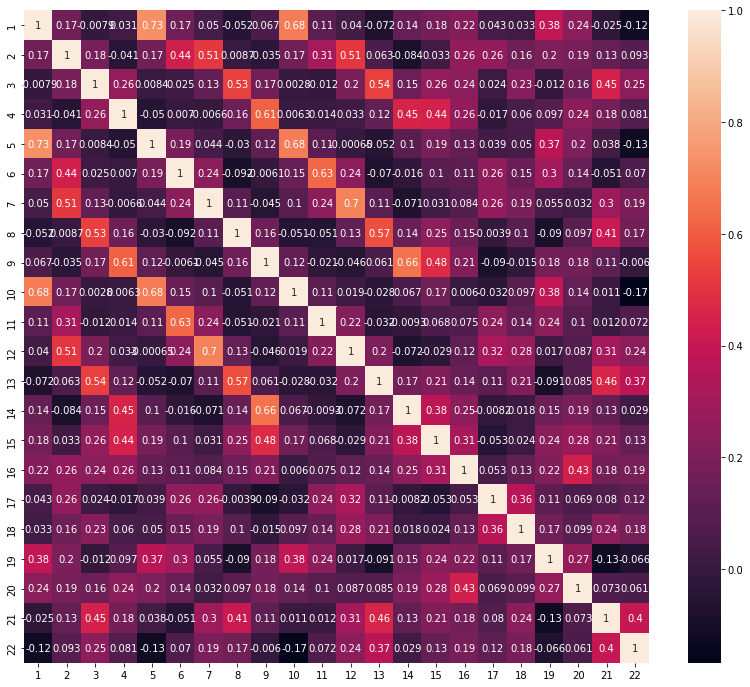

In [ ]:
plt.figure(figsize=(14,12))
sns.heatmap(SPECT.corr(), annot=True)

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=6, random_state=0)
df = pd.DataFrame(pca.fit_transform(SPECT))

ddf = df.copy()
ddf['class'] = classes

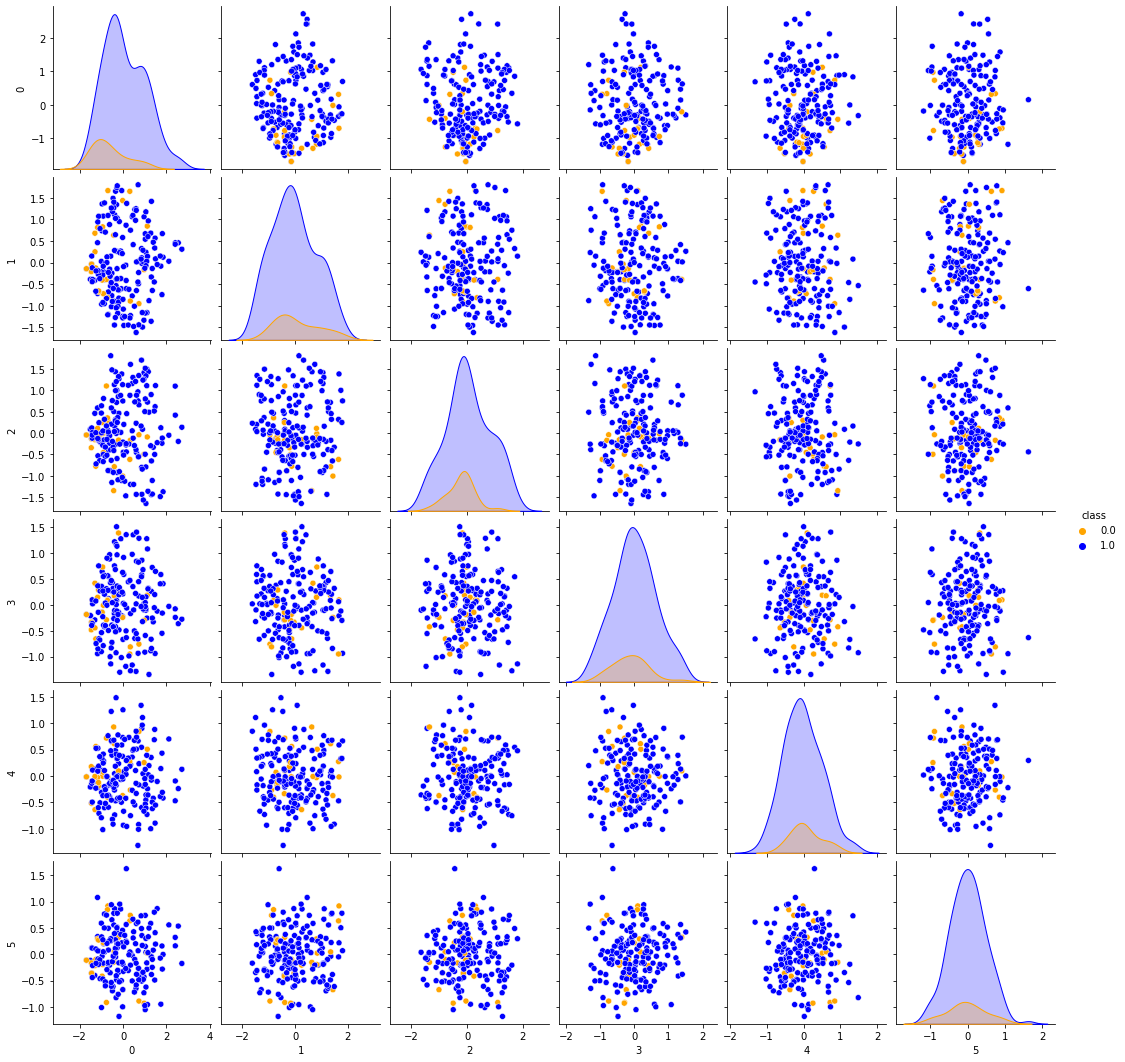

In [ ]:
sns.pairplot(ddf, hue='class', palette={0: 'orange', 1:'blue'})

In [ ]:
df

,0,1,2,3,4,5
0,-0.517126,-0.766263,-1.158570,-0.389349,0.650993,0.299348
1,-0.022624,-1.248726,-1.059517,-0.219677,0.374578,0.457187
2,-0.298500,0.262104,-0.260778,1.509242,0.002388,0.423803
3,-0.859616,-0.395861,0.293573,-0.424020,-0.600392,0.043368
4,-0.675504,-0.680631,-0.407896,0.121250,-0.589755,0.081746
...,...,...,...,...,...,...
223,-1.165864,0.941270,-0.127366,0.366610,0.092063,0.065536
224,-0.448635,-0.599471,-0.920812,-0.423274,-0.080498,-0.035481
225,-0.345222,1.024483,0.993642,-0.520206,-0.143649,0.023812
226,0.026919,-0.093689,-0.516180,0.916445,-0.666749,0.141039


In [ ]:
classes

0      1
1      1
2      1
3      1
4      1
      ..
259    0
260    0
263    0
264    0
265    0
Name: 0, Length: 228, dtype: int64

Text(0.5, 0.92, '3D plot of KMeans Clustering')

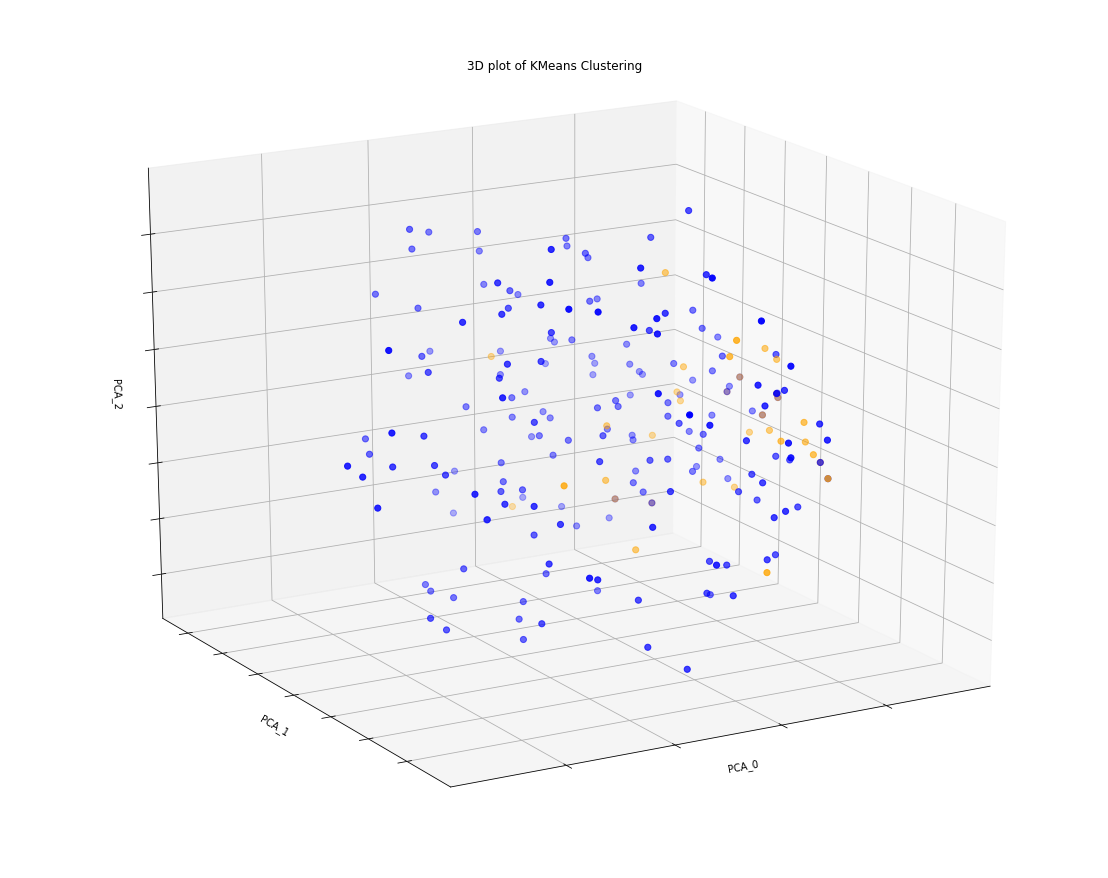

In [ ]:
fig = plt.figure(figsize=(16, 12))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=20, azim=60)
labels = classes.apply(lambda r: ['orange', 'blue'][r])
ax.scatter(df[0], df[1], df[2], c=labels, marker='.', s=150)
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('PCA_0')
ax.set_ylabel('PCA_1')
ax.set_zlabel('PCA_2')
ax.set_title('3D plot of KMeans Clustering')


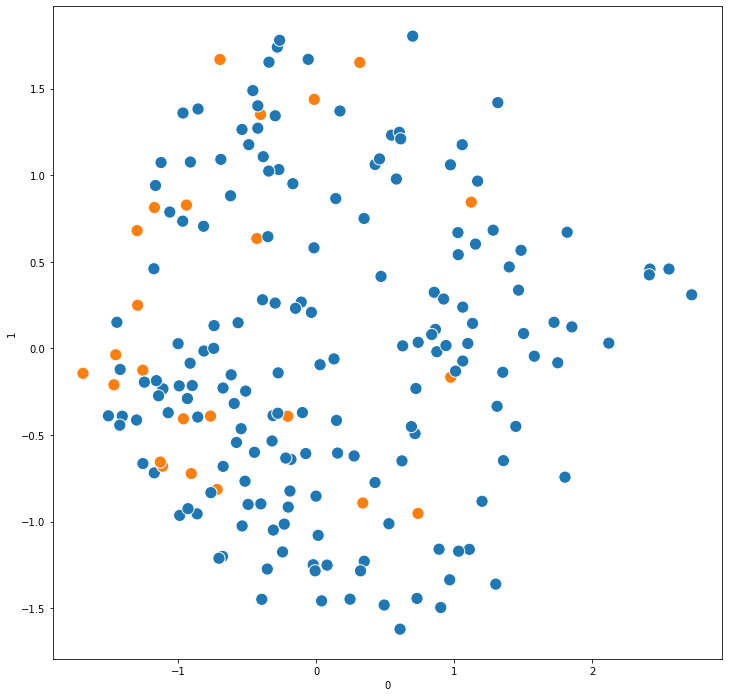

In [ ]:
plt.figure(figsize=(12,12))
sns.scatterplot(x=df[0], y=df[1], hue=labels, legend=False, s=150,)
# plt.scatter(self.centroids[:, 0], self.centroids[:, 1], marker='x', s=150, c='black')

## 

In [ ]:
from   model.dqc import DQC
import model.base_dqc as dqc

In [ ]:
classes

0      1
1      1
2      1
3      1
4      1
      ..
259    0
260    0
263    0
264    0
265    0
Name: 0, Length: 228, dtype: int64

In [ ]:
duplicates = SPECT[SPECT.duplicated()].index
SPECT_ = SPECT.drop(duplicates)
classes_ = classes.drop(duplicates)


In [ ]:
def run_model(df, SIGMA = 0.01, M = 0.07):
  edqc = DQC(df)
  edqc.calculate_N(SIGMA)
  N = np.array(edqc.N)
  data_fit = np.array(edqc.data_fit)
  H = dqc.calculate_H(data_fit,SIGMA,M)
  H = dqc.basis_transform(H,N)
  H = (np.abs(H) <= 1) * 1 + (np.abs(H) > 1) * -1
  X = dqc.calculate_X(data_fit,M)
  X = dqc.basis_transform(X,N,is_expectation=True)

  P,H = dqc.diagonalize_H(H)

  H = np.round(H, 4)

  # H = H < -4

  traj,N_traj = dqc.trajectory(df,P,H,X,N,steps=10000,delta=10**4,sigma=SIGMA,m=M,stride=50)
  S = dqc.reverse_entropy(traj, N_traj)

  return N, H, X , P, traj, N_traj, S

In [ ]:
N, H, X , P, traj, N_traj, S = run_model(SPECT_, SIGMA = 1, M = 0.1)

/content/drive/MyDrive/Project/EDQC/dqc/model/base_dqc.py:229: ComplexWarning: Casting complex values to real discards the imaginary part
  H_diag[i] = evals[i] * H_diag[i]
/content/drive/MyDrive/Project/EDQC/dqc/model/base_dqc.py:391: RuntimeWarning: divide by zero encountered in double_scalars
  S[step] = S[step] - 1/p * np.log(1/p)


In [ ]:
S

array([          -inf, 9.01542516e-17, 2.97855465e-16, 7.34501411e-17,
       3.79439339e-17, 2.35821920e-17, 3.53219065e-17, 4.62150462e-16,
       6.07645488e-17, 4.59629838e-18, 1.91682765e-18, 2.53486093e-18,
       4.31989509e-17, 2.80207135e-17, 4.00700522e-17, 5.90345371e-17,
       4.45858650e-16, 9.53674424e-17, 2.16820488e-17, 5.22788524e-17,
       7.02815780e-17, 1.98009029e-18, 6.31520398e-17, 1.20539827e-16,
       1.87341541e-16, 6.38211668e-16, 4.38700254e-16, 3.51987020e-16,
       3.22969410e-17, 2.31229042e-18, 1.49784931e-18, 4.86219735e-18,
       8.13202064e-18, 1.31663116e-17, 3.61597777e-18, 1.37539228e-16,
       5.57900330e-16, 2.39482769e-15, 1.12482672e-16, 9.50723036e-18,
       2.48895621e-15, 1.38095377e-16, 3.02249460e-17, 9.52635538e-18,
       2.41233218e-17, 4.56842972e-17, 7.94139162e-17, 2.05618299e-18,
       1.22624452e-17, 1.65482220e-17, 1.85534220e-16, 4.85678091e-17,
       2.73191917e-16, 1.88666403e-16, 2.33159187e-16, 2.21714128e-17,
      

In [ ]:
H.diagonal()

array([ 2.143142e+02,  3.206800e+00,  3.159800e+00,  2.887800e+00,
        2.676200e+00, -7.178200e+00, -6.997200e+00, -6.724800e+00,
       -6.660100e+00, -6.257000e+00, -6.168800e+00, -6.060500e+00,
       -5.908600e+00, -5.768600e+00, -5.702900e+00, -5.672400e+00,
       -5.570800e+00, -5.548300e+00, -5.521300e+00, -5.354400e+00,
       -5.379300e+00,  2.307400e+00,  2.185700e+00,  2.058200e+00,
        1.995300e+00, -6.000000e+00, -4.494000e+00, -5.212100e+00,
       -5.105500e+00, -5.006300e+00, -4.877100e+00, -4.687600e+00,
        1.603900e+00,  1.800700e+00,  1.721300e+00,  1.684700e+00,
       -4.352700e+00, -4.289100e+00, -4.166100e+00, -4.095400e+00,
        1.548700e+00,  1.524500e+00,  1.373600e+00,  1.462200e+00,
       -3.829400e+00, -3.706900e+00, -3.764700e+00, -3.588500e+00,
       -3.628500e+00,  2.000000e+00,  1.079600e+00,  4.925000e-01,
        1.207100e+00,  6.863000e-01,  8.058000e-01,  8.816000e-01,
        3.507000e-01,  2.711000e-01, -1.109900e+00, -3.127600e

In [ ]:
H_ = pd.DataFrame(H.diagonal(), columns=['H'])
H_['class'] = classes_

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


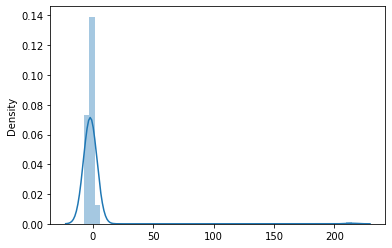

In [ ]:
sns.distplot(H.diagonal())

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


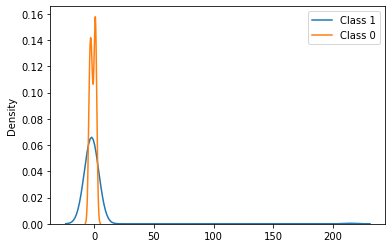

In [ ]:
# sns.distplot(H.diagonal(), hist=False, label='All states')
HH = H.diagonal()
c = classes_.reset_index(drop=True)
lc = list(c[c == 0].index)
ll = list(c[c == 1].index)
sns.distplot(HH[ll],hist=False, label='Class 1')
sns.distplot(HH[lc],hist=False, label='Class 0')
plt.legend()

Text(0, 0.5, 'Reverse Entropy (1/S)')

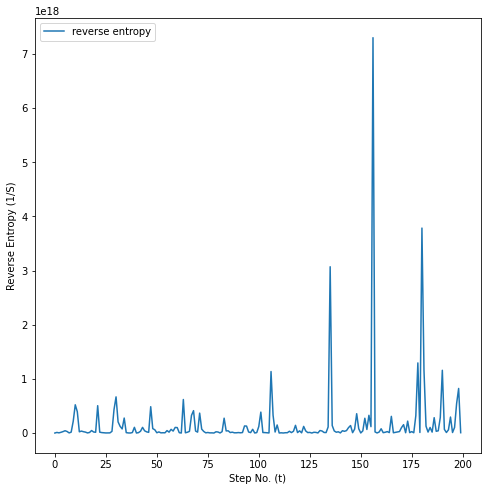

In [ ]:
ax = pd.DataFrame(1/S, columns=['reverse entropy']).plot(figsize=(8,8), )
ax.set_xlabel("Step No. (t)")
ax.set_ylabel("Reverse Entropy (1/S)")

In [ ]:
np.where((1/S).max() == 1/S)

(array([156]),)

In [ ]:
N, H, X , P, traj, N_traj, S = run_model(df, SIGMA = .1, M = 1)

/content/drive/MyDrive/EDQC/dqc/model/base_dqc.py:229: ComplexWarning: Casting complex values to real discards the imaginary part
  H_diag[i] = evals[i] * H_diag[i]
/content/drive/MyDrive/EDQC/dqc/model/base_dqc.py:391: RuntimeWarning: divide by zero encountered in double_scalars
  S[step] = S[step] - 1/p * np.log(1/p)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

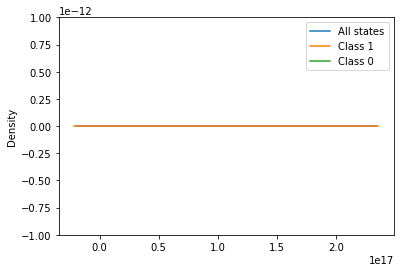

In [ ]:
sns.distplot(H.diagonal(), hist=False, label='All states')
HH = H.diagonal()
c = classes_.reset_index(drop=True)
lc = list(c[c == 0].index)
ll = list(c[c == 1].index)
sns.distplot(HH[ll],hist=False, label='Class 1')
sns.distplot(HH[lc],hist=False, label='Class 0')
plt.legend()

In [ ]:
np.round(HH / 1e12, 2)

array([ 2.1890325e+05,  3.4219770e+04,  1.8443400e+03, -4.7855900e+03,
        1.3414100e+03, -4.8236000e+02, -3.9907000e+02,  4.0484000e+02,
       -3.9220000e+01, -4.7240000e+01,  1.1204000e+02,  2.0760000e+01,
        1.0810000e+01, -2.3010000e+01, -1.1940000e+01, -8.3800000e+00,
       -8.6500000e+00,  4.9900000e+00, -2.7600000e+00,  1.4500000e+00,
        6.0000000e-01, -2.3000000e-01,  2.0000000e-02,  4.0000000e-02,
       -4.0000000e-02,  1.0000000e-02, -1.0000000e-02,  1.0000000e-02,
        0.0000000e+00, -0.0000000e+00, -0.0000000e+00,  0.0000000e+00,
       -0.0000000e+00, -0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
       -0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
       -0.0000000e+00,  0.0000000e+00,  0.0000000e+00, -0.0000000e+00,
       -0.0000000e+00,  0.0000000e+00, -0.0000000e+00,  0.0000000e+00,
       -0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
        0.0000000e+00, -0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
      

In [ ]:
color_selection = [((0, 39), 'blue'), ((80, 251), 'blue'), ((40, 78), 'orange'), ((251,265), 'orange')]

In [ ]:
directory = '/content/drive/MyDrive/Project/EDQC/data/uci/{}/'.format(label.lower())

if not os.path.exists(directory):
        os.mkdir(directory)
        
os.chdir(directory)

_tmp = dqc.plot_steps(traj, color_selections=color_selection)
del(_tmp)

animator()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>